# Iris dataset classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Species'] 

iris = pd.read_csv('iris.data', names=columns)

In [7]:
iris

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.shape

(150, 5)

In [10]:
iris.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
iris.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

In [13]:
print(iris['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


### Data visualization

Text(0, 0.5, 'petal length')

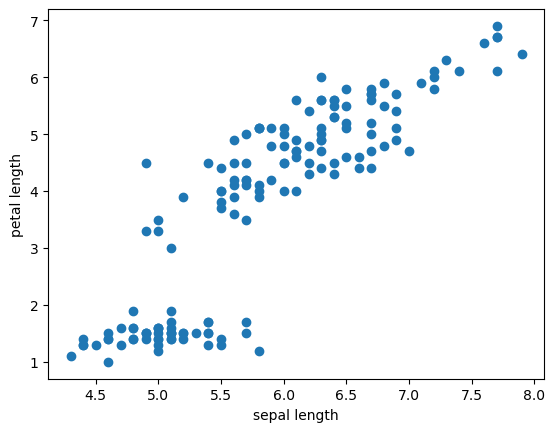

In [17]:
plt.scatter(iris['Sepal_length'], iris['Petal_length'])

plt.xlabel('sepal length')
plt.ylabel('petal length')

In [18]:
iris.sample(5)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
8,4.4,2.9,1.4,0.2,Iris-setosa
104,6.5,3.0,5.8,2.2,Iris-virginica
25,5.0,3.0,1.6,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor


In [19]:
iris['Species'] = iris['Species'].replace({'Iris-virginica': 0, 'Iris-versicolor': 1, 'Iris-setosa': 2})

In [20]:
iris.sample(5)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
20,5.4,3.4,1.7,0.2,2
16,5.4,3.9,1.3,0.4,2
108,6.7,2.5,5.8,1.8,0
31,5.4,3.4,1.5,0.4,2
77,6.7,3.0,5.0,1.7,1


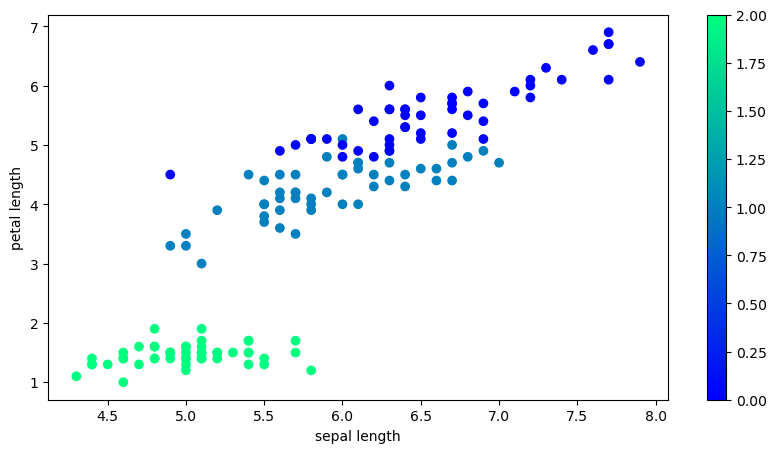

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(iris['Sepal_length'], iris['Petal_length'], c=iris['Species'], cmap=('winter'))

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.colorbar()

### Box plots to visualize feature distributions by species¶

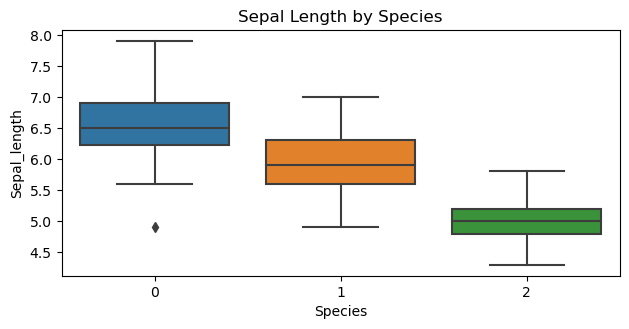

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='Sepal_length', data=iris)
plt.title('Sepal Length by Species')
plt.tight_layout()
plt.show()

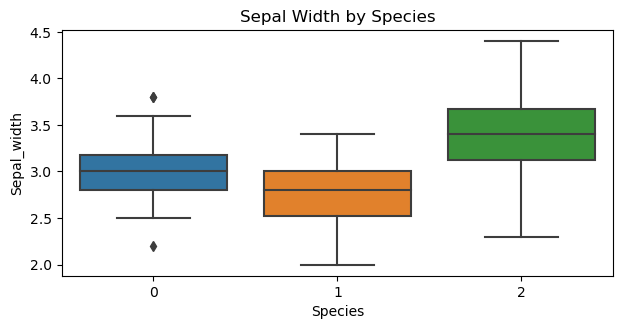

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='Sepal_width', data=iris)
plt.title('Sepal Width by Species')
plt.tight_layout()
plt.show()

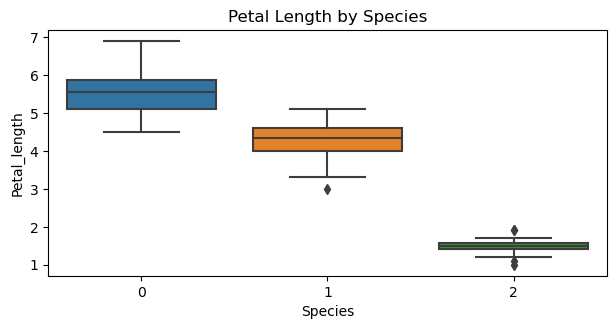

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='Petal_length', data=iris)
plt.title('Petal Length by Species')
plt.tight_layout()
plt.show()

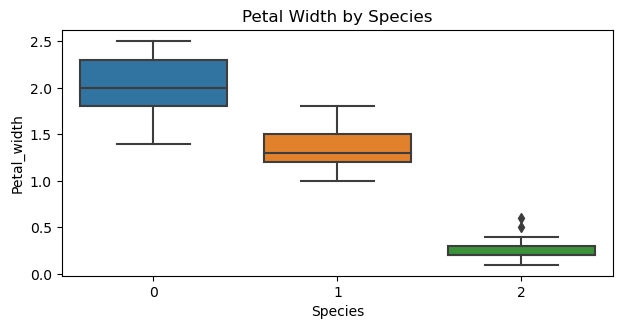

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='Petal_width', data=iris)
plt.title('Petal Width by Species')
plt.tight_layout()
plt.show()

### Correlation heatmap

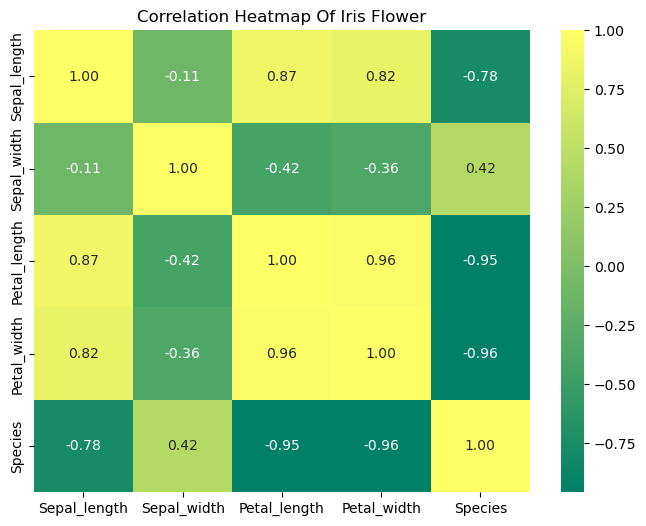

In [29]:
plt.figure(figsize=(8, 6))
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='summer', fmt=".2f")
plt.title("Correlation Heatmap Of Iris Flower")
plt.show()

### Check Relationship:

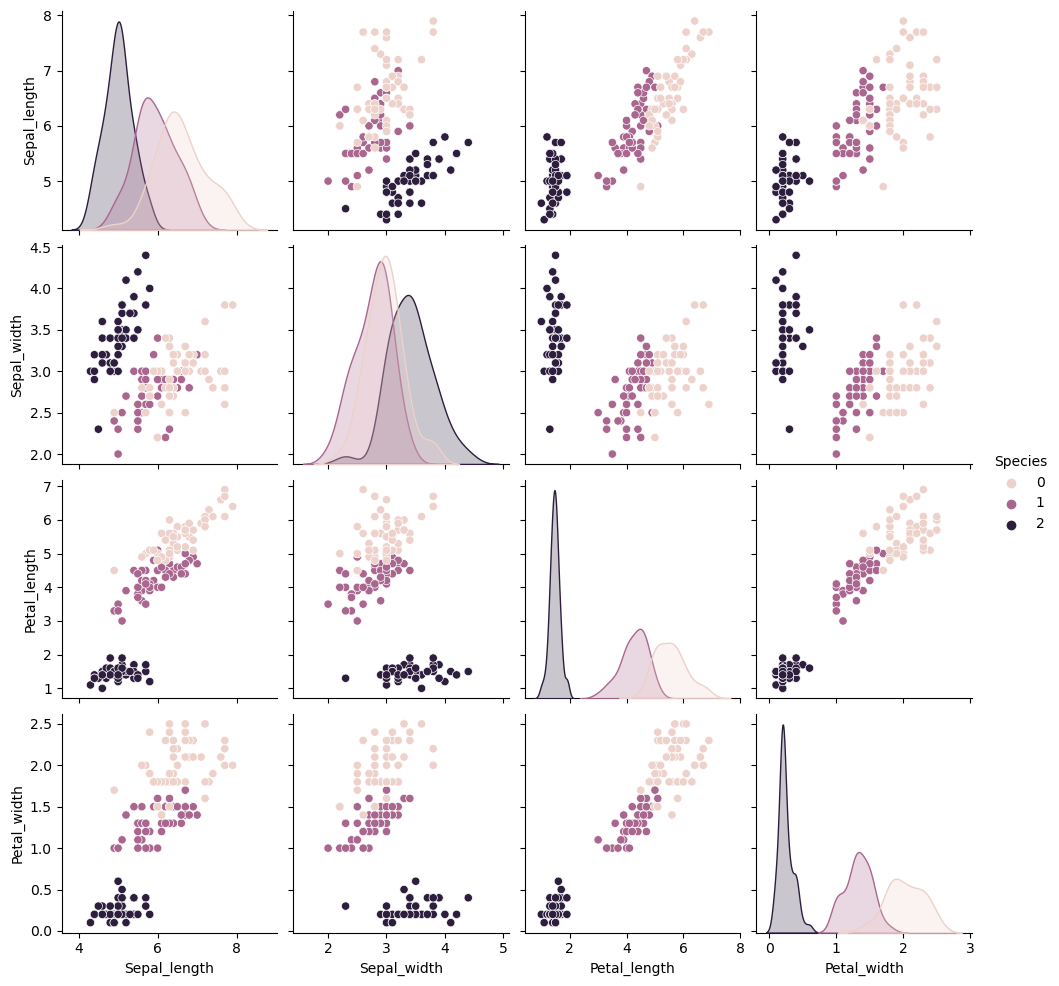

In [30]:
sns.pairplot(data=iris, hue='Species')
plt.show()

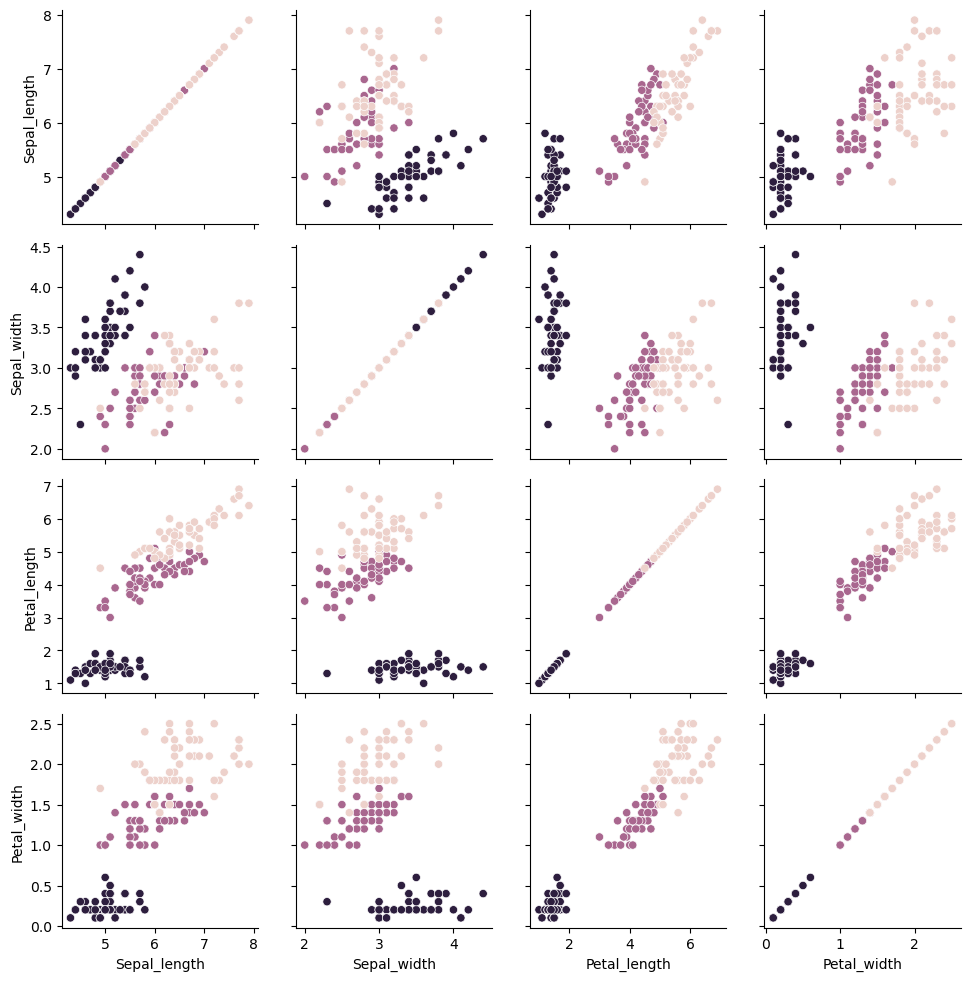

In [31]:
# pairgrid

g = sns.PairGrid(data=iris,  hue='Species')
g.map(sns.scatterplot)

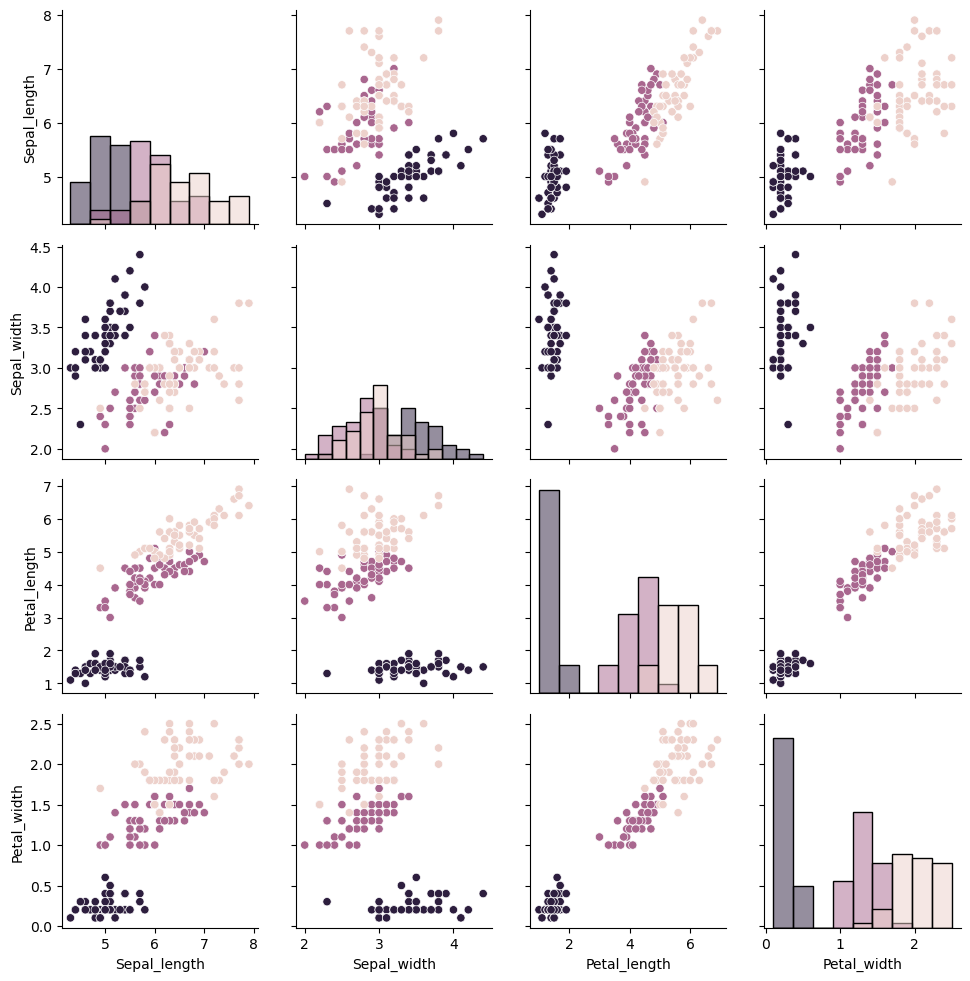

In [32]:
#  map_diag vs map_offdiag

g = sns.PairGrid(data=iris, hue='Species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [33]:
iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


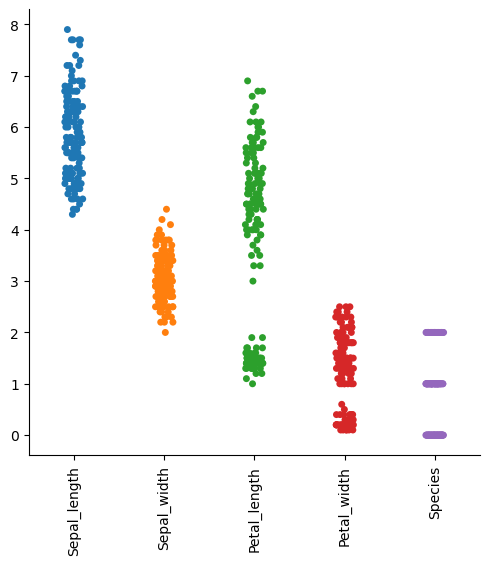

In [34]:
sns.catplot(data=iris)
plt.xticks(rotation='vertical')
plt.show()

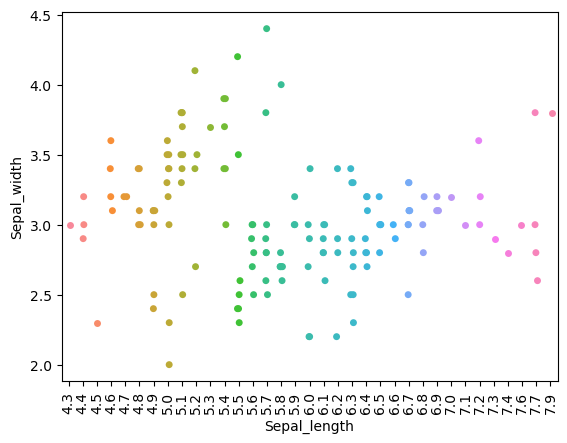

In [38]:
sns.stripplot(data=iris , x='Sepal_length', y='Sepal_width')
plt.xticks(rotation='vertical')
plt.show()

## check outliers using boxplot

Sepal_length       AxesSubplot(0.125,0.786098;0.352273x0.0939024)
Sepal_width     AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
Petal_length       AxesSubplot(0.125,0.673415;0.352273x0.0939024)
Petal_width     AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
Species            AxesSubplot(0.125,0.560732;0.352273x0.0939024)
dtype: object

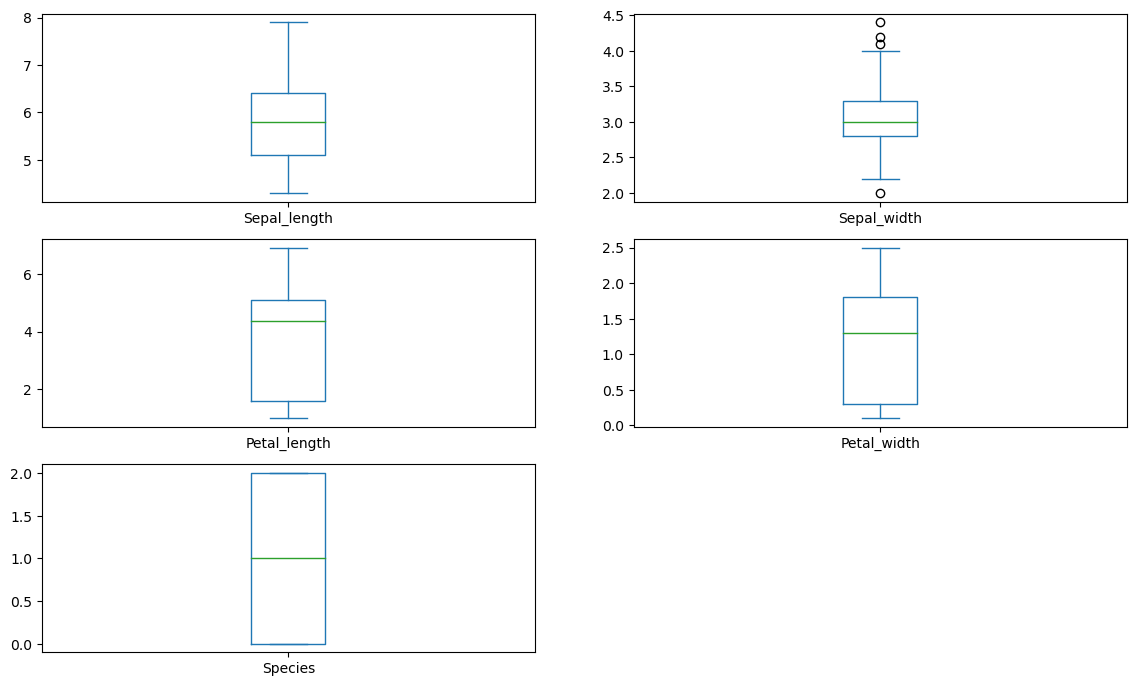

In [39]:
iris.plot(kind = "box",subplots = True,layout = (7,2),figsize=(14,20))

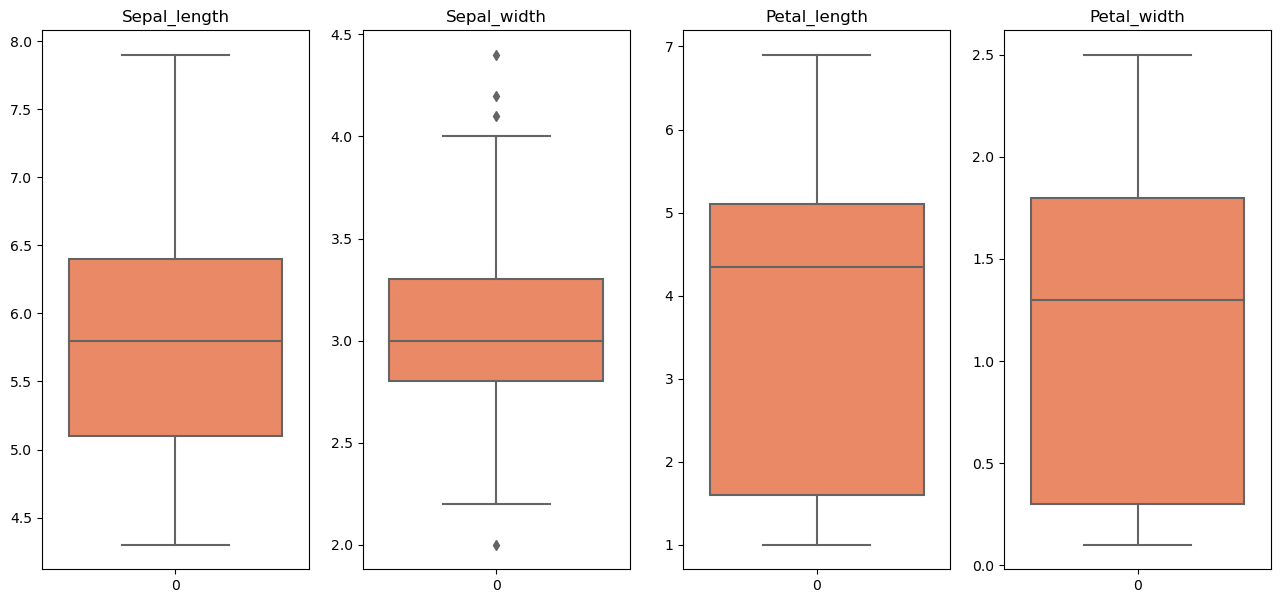

In [40]:
plt.subplots(figsize=(20,7)) 
for i,a in enumerate(iris.drop(columns="Species").columns):
    plt.subplot(1,5,i+1)
    sns.boxplot(data=iris[a],color="coral")
    plt.title(a)
plt.show()

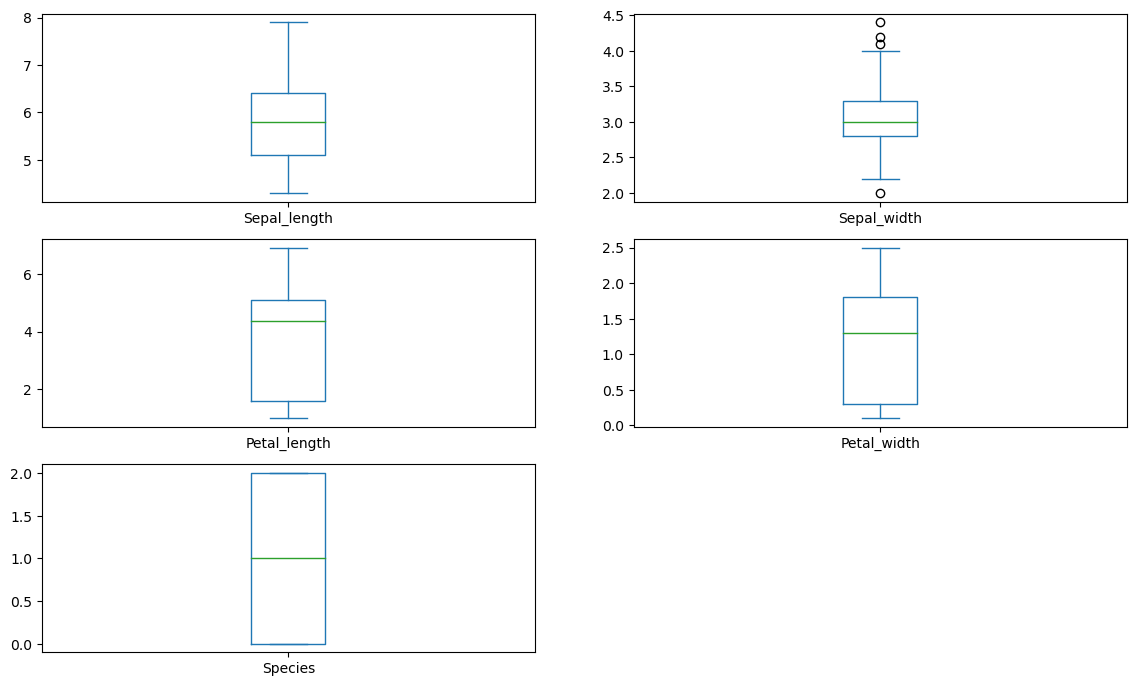

In [41]:
iris.plot(kind = "box",subplots = True,layout = (7,2),figsize=(14,20))
plt.show()

In [42]:
x = iris.drop(columns="Species")
y = iris["Species"]

## Test and Train

In [43]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic reggresion

In [45]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [46]:
y_pred = lr.predict(X_test)

In [47]:
y_pred

array([0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1,
       2, 2, 0, 2, 2, 1, 1, 2], dtype=int64)

In [48]:
y_train

137    0
84     1
27     2
127    0
132    0
      ..
9      2
103    0
67     1
117    0
47     2
Name: Species, Length: 120, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
matrix= confusion_matrix(y_test, y_pred)
print(matrix)

[[ 6  0  0]
 [ 0 13  0]
 [ 0  0 11]]


In [50]:
print(accuracy_score(y_test,y_pred))

1.0


In [51]:
cr= classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

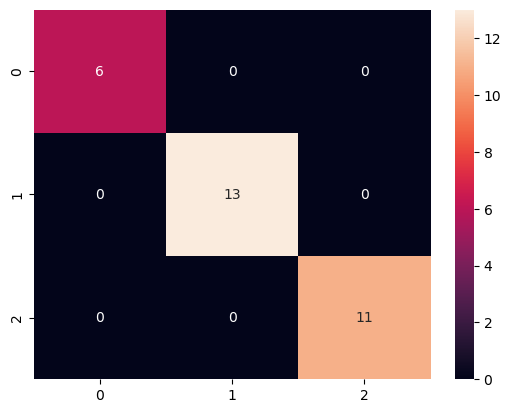

In [52]:
sns.heatmap(matrix, annot=True)

#### Random Forest Classification

In [53]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [55]:
rfc.fit(X_train, y_train)

# Predict the species on the test data
y_pred = rfc.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [57]:
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[ 6  0  0]
 [ 0 13  0]
 [ 0  0 11]]


<AxesSubplot:>

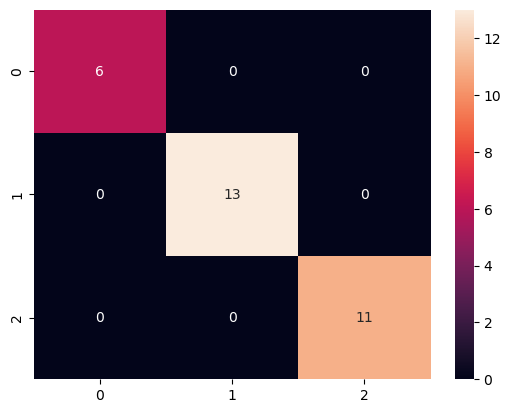

In [58]:
sns.heatmap(conf_matrix, annot=True)

### Probability density function(PDF) in iris dataset
FEATURE SELECTION

In [59]:
iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


<AxesSubplot:xlabel='Petal_length', ylabel='Density'>

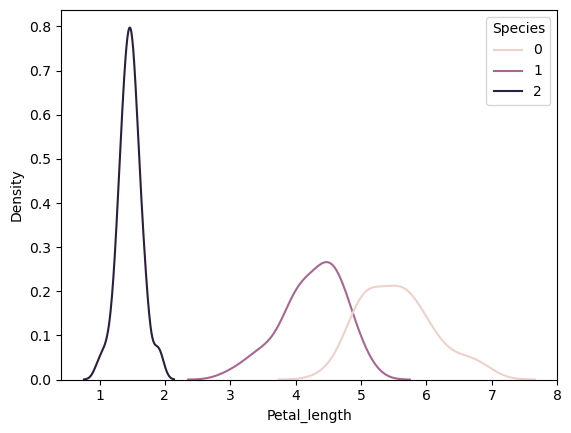

In [65]:
sns.kdeplot(iris['Petal_length'],hue=iris['Species'])

<AxesSubplot:xlabel='Petal_width', ylabel='Density'>

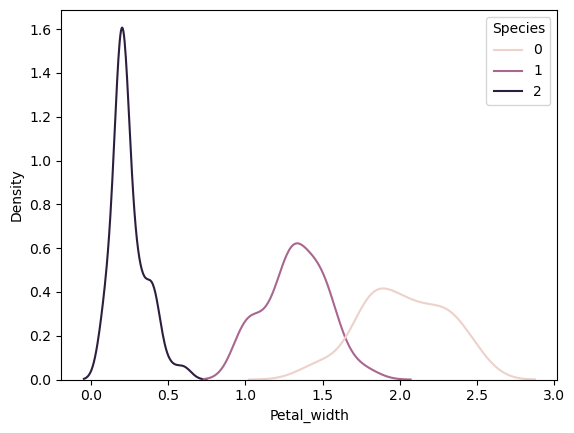

In [70]:
sns.kdeplot(iris['Petal_width'],hue=iris['Species'])

<AxesSubplot:xlabel='Sepal_length', ylabel='Density'>

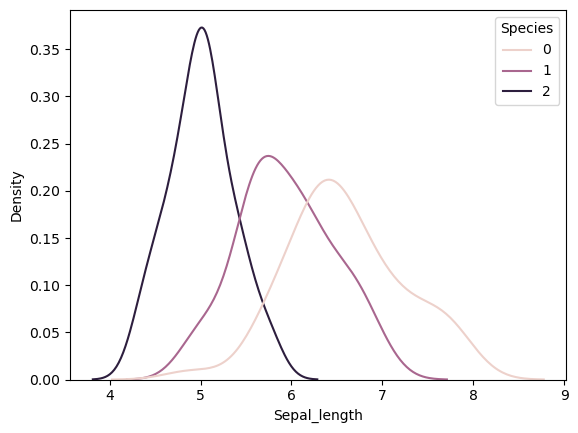

In [75]:
sns.kdeplot(iris['Sepal_length'],hue=iris['Species'])

<AxesSubplot:xlabel='Sepal_width', ylabel='Density'>

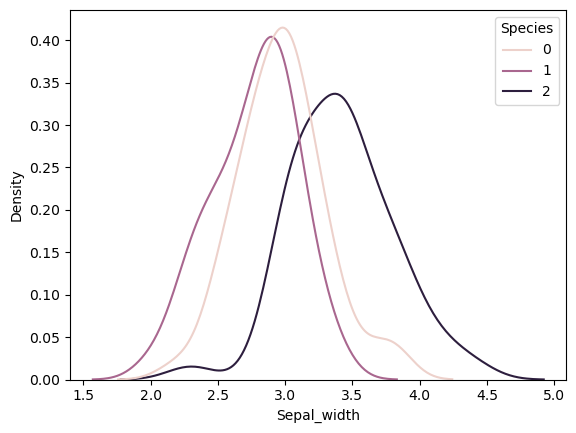

In [76]:
sns.kdeplot(iris['Sepal_width'],hue=iris['Species'])

Que. GIVEN THIS FOUR MAJORMENT WE PREDICT THE TYPE OF FLOWER?

Ans:- With the help of graph it clearly show that petal_length and petal_width is better indicator of distinguish between this three flower.

###   Cumulative distribution function (cdf) 

<AxesSubplot:xlabel='Petal_width', ylabel='Density'>

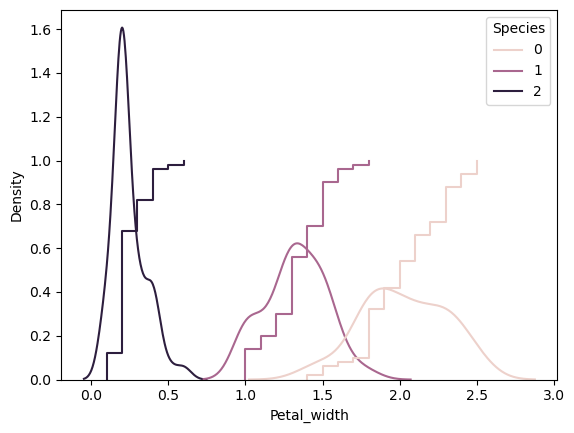

In [74]:
sns.kdeplot(iris['Petal_width'],hue=iris['Species'])
sns.ecdfplot(data=iris, x='Petal_width', hue='Species')